# Project 02 - Due Friday, November 11 at 12pm

*Objectives*: Gain experience loading a transactional dataset into a relational database model you define yourself and using SQL to explore its contents. Transform the data into a star schema, documenting the schema visually, and explore the transformed data analytically by writing and executing a number of SQL queries using common syntax and functions and describing your findings.  Gain practice working on these tasks with a partner.

*Grading criteria*: The tasks should all be completed, and questions should all be answered with SQL queries, diagrams, and charts in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible at datanotebook.org, from start to finish: another person should be able to use the same code to obtain the same results as yours.  Note that you will receive no more than partial credit if you do not add text/markdown cells explaining your thinking at each major step in each problem.

*Attestation*: **Work in pairs**.  At the end of your submitted notebook, identify the work each partner performed and attest that each contributed substantially to the work.

*Deadline*: Friday, November 11, 12pm.  One member of each pair must submit your notebook to Blackboard; you should not both submit it separately.  You may each push a copy to your own GitHub repository.


## Setup - select and obtain data

The US City Open Data Census has a variety of [transactional data from all over the country](http://us-city.census.okfn.org/).  Select one topic and one city from this Census, download the data, and explain your reason for this choice before proceeding.  Provide a link to the web page for the data set you've chosen.

I strongly encourage you to select a dataset from among the following topics:  Crime, Property Assessment, Campaign Finance Contributions, Service Requests (311), and Web Analytics.

By *transactional* data I mean records at the grain of one event per business process.  In the case of Service Requests (311), for example, that would require data at the level of each individual report of a service request.  If this isn't clear, think about the bike trip data - each individual ride was included - and look for data at that level of event/process specificity.  Avoid data like the Connecticut boating data, which was summarized by year, not individual transactions.

Please aim for a dataset of at least 10,000 individual records, but less than 250,000 records.  A little more or a little less is okay, but try to stay within these limits.

We chose data of crime in Baltimore: https://data.baltimorecity.gov/Public-Safety/BPD-Arrests/3i3v-ibrt

### 1. Select one topic and one city from this Census

We select the crime topic and Baltimore, MD from this Census. 

### 2. Download the data

We download the csv file named as BPD_Arrests.

### 3. Explain the reason for this choice before proceeing

First, we are interested in crime data, and Baltimore is kind of famous for its crime, so we choose the Baltimore as the city. Second, the database we download has many useful and insightful variables, like race, sex instance location and neighbourhood, which are convenient for us to dig into the data and maybe find out something interesting. Third, the dataset accords to the demands listed in the question. The database has 129836 records and it is transcational data. 

### 4. The link to the web page for the dataset

https://data.baltimorecity.gov/Public-Safety/BPD-Arrests/3i3v-ibrt

## Problem 1 - examine the data (20 points)

Use `csvstat`, `pandas`, or other tools as you see fit and observe the contents of your dataset.  Review important points from any metadata provided.  Describe what you see:  What do the columns mean?  Are there null values?  Which columns interest you the most?  Which columns present some opportunities, challenges, or questions you would like to ask?

In [1]:
!mv BPD_Arrests.csv BPD.csv

In [2]:
!wc -l BPD.csv

129837 BPD.csv


In [3]:
!csvcut -n BPD.csv

  1: Arrest
  2: Age
  3: Sex
  4: Race
  5: ArrestDate
  6: ArrestTime
  7: ArrestLocation
  8: IncidentOffense
  9: IncidentLocation
 10: Charge
 11: ChargeDescription
 12: District
 13: Post
 14: Neighborhood
 15: Location 1


In [4]:
!csvstat BPD.csv

  1. Arrest
	<class 'int'>
	Nulls: True
	Min: 13610381
	Max: 16154217
	Sum: 1783148713031
	Mean: 14513545.494754234
	Median: 14118493
	Standard Deviation: 862754.9466899642
	Unique values: 122845
	5 most frequent values:
		16144428:	2
		16145794:	2
		16146910:	2
		14095005:	2
		16144347:	2
  2. Age
	<class 'int'>
	Nulls: True
	Min: 0
	Max: 100
	Sum: 4280194
	Mean: 32.97326821151239
	Median: 30.0
	Standard Deviation: 11.593220356436293
	Unique values: 74
	5 most frequent values:
		22:	5982
		24:	5952
		23:	5933
		21:	5909
		25:	5489
  3. Sex
	<class 'str'>
	Nulls: False
	Values: F, M
  4. Race
	<class 'str'>
	Nulls: False
	Values: I, W, B, U, A
  5. ArrestDate
	<class 'datetime.date'>
	Nulls: False
	Min: 2013-01-01
	Max: 2016-10-29
	Unique values: 1398
	5 most frequent values:
		2013-08-15:	186
		2014-01-09:	182
		2013-05-29:	178
		2014-04-23:	175
		2014-03-06:	172
  6. ArrestTime
	<class 'str'>
	Nulls: False
	Unique values: 2312
	5 most frequent values:
		19:00:	2053
		18:00:	2018
		20

### 1. What do the columns mean?

1. Arrest: this is the id for every arrest to make sure each arrest is distinct and can be identifited.
2. Age: the age of criminal 
3. Sex: the sex of criminal
4. Race: the race of criminal
5. ArrestDate: the date when the arrest happened 
6. ArrestTime: the time when the arrest happened
7. ArrestLocation: the locatin where the arrest happened
8. Incidentoffense: whether there is an offense when the incident happened
9. IncidentLocation: the location where the incident happened
10. Charge : the charge id or serial number of the criminal
11. ChargeDescription: the description of the charge
12. District: the distric where the incident happened
13. Post: the post number where the incidnet happened
14. Neighborhood: the beighborhood where the incident happened
15. Location 1: the longitude and latitude where the incident happened

### 2. Are there null values?

The variables listed below have null values:

Arrest, Age, ArrestLocation, IncidentLocaiton, Charge, ChargeDescriptin, District, Post, Neighborhood and Location 1 

### 3. Which columns interest you the most? 

Age, Sex and Race can give us a basic descrition of the criminal. If we dig into them, we might find a pattern of cirminals. Besides, the difference between IncidentLocation and ArrestLocation can tell us if the police officer is quickly and efficent enough to arrest criminals in the place where the incident happened. And if there are some other probabilities that lead to the differences between the IncidentLocation and ArrestLocation like the distance between incident location and police officer or nobody called the police about the incident, or the incident is too harmless to let witness to call police? Those questions can be figured out by using ChargeDescription and IncidentLocation and ArrestLocation. Also, we might find the patter that each crime happened frequency by using the Neighborhood and Distric dimensions.

### 4. Which columns present some opportunities, challenges, or questions you would like to ask?

Opportunities: Through studying, we might find some patterns of criminals and some relationship between crime types and criminals. Also, we can study the change of crimes as the change of months.


Challenges: there are a lot of variables have null values, but we have enough data, it may not be a big problem.
 
Questions: which District and neighborhood are the places where the most crimes happened? Is there any realtionships  between criminals and crime types? Is there any differences between IncidentLocation and ArrestLocation. Is there any patterns of criminals?

## Problem 2 - define a database model, load the data, and explore (20 points)

Based on what you found above, create and connect to a new database, define a database table in it, and load this dataset into it.  You may use either of the methods for this step you have seen in earlier class notebooks.  You may choose to eliminate variables/columns if they are not relevant or interesting to you - explain your reasoning if you do.  Either way, you should load a majority of the columns present in the source dataset as it is in its raw form into the database, and all of its rows.

Once your data has loaded successfully, run a `COUNT(*)` query to verify that all the data has loaded correctly.

Explore the data to zero in on a few themes you would like to further study analytically.  Discuss columns that present opportunities for extraction into dimensions, and identify the specific columns that contain facts you want to measure.

###  1. Create and connect to a new database

In [5]:
%load_ext sql

/opt/conda/lib/python3.5/site-packages/IPython/config.py:13: ShimWarning: The `IPython.config` package has been deprecated. You should import from traitlets.config instead.
  "You should import from traitlets.config instead.", ShimWarning)
/opt/conda/lib/python3.5/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [6]:
!echo 'redspot' | sudo -S service postgresql restart

[sudo] password for jovyan: Restarting PostgreSQL 9.5 database server: main.


In [7]:
!createdb -U dbuser BPD

In [8]:
%sql postgresql://dbuser@localhost:5432/BPD

'Connected: dbuser@BPD'

 ### 2. Define a database table in the database, and load this dataset into the database

In [9]:
%%sql
DROP TABLE IF EXISTS crime;
CREATE TABLE crime (
    arrest INTEGER,
    age INTEGER,
    sex CHAR(1),
    race CHAR(1),
    arrest_date TIMESTAMP,
    arrest_time VARCHAR(5),
    arrest_location VARCHAR(33),
    incident_offence VARCHAR(28),
    incident_location VARCHAR(34),
    charge VARCHAR(6),
    charge_description VARCHAR(54),
    district VARCHAR(12),
    post INTEGER,
    neighborhood VARCHAR(33),
    location1 VARCHAR(31)
);

Done.
Done.


[]

In [10]:
!pwd

/home/jovyan/work


In [11]:
%%sql
COPY crime FROM '/home/jovyan/work/BPD.csv'
CSV
HEADER
QUOTE '"'
DELIMITER ',';

129836 rows affected.


[]

### 3. Run a COUNT(*) query to verify that all the data has loaded correctly

In [12]:
%%sql
SELECT COUNT(*) FROM crime;

1 rows affected.


count
129836


### 4. Handle null value

In [13]:
%%sql
UPDATE crime
SET arrest = 0    
WHERE arrest IS NULL;    

6975 rows affected.


[]

In [14]:
%%sql
UPDATE crime
SET age = 0    
WHERE age IS NULL;    

28 rows affected.


[]

In [15]:
%%sql
UPDATE crime
SET arrest_location = 0    
WHERE arrest_location IS NULL;  

51722 rows affected.


[]

In [16]:
%%sql
UPDATE crime
SET incident_location = 0    
WHERE incident_location IS NULL; 

53337 rows affected.


[]

In [17]:
%%sql
UPDATE crime
SET charge = 0    
WHERE charge IS NULL; 

16357 rows affected.


[]

In [18]:
%%sql
UPDATE crime
SET charge_description = 0    
WHERE charge_description IS NULL; 

502 rows affected.


[]

In [19]:
%%sql
UPDATE crime
SET district = 0    
WHERE district IS NULL; 

51713 rows affected.


[]

In [20]:
%%sql
UPDATE crime
SET post = 0    
WHERE post IS NULL;

51731 rows affected.


[]

In [21]:
%%sql
UPDATE crime
SET neighborhood = 0    
WHERE neighborhood IS NULL;

51721 rows affected.


[]

In [22]:
%%sql
UPDATE crime
SET location1 = 0    
WHERE location1 IS NULL;

51251 rows affected.


[]

### 5. Explore the data 

#### a. Analyze sex

In [23]:
%%sql
SELECT sex, COUNT(sex)
FROM crime
GROUP BY sex;

2 rows affected.


sex,count
F,24699
M,105137


#### There are fifth six of criminals are female, which are almost five time the number of female criminals

#### b. Analyze race

In [24]:
%%sql
SELECT race, COUNT(race)
FROM crime
GROUP BY race;

5 rows affected.


race,count
I,373
B,105921
W,20555
U,2646
A,341


/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


<Container object of 5 artists>

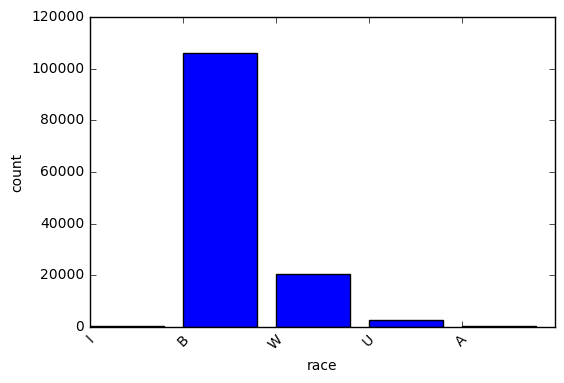

In [25]:
%matplotlib inline
result = _
result.bar()

#### As we can see in the picture, it is significant that race b has the largest frequency. White is the next.  The other three counts a little proportion.

#### c. Analyze arrest date

In [26]:
%%sql
SELECT arrest_date, count(arrest_date)
FROM crime
GROUP BY arrest_date
ORDER BY COUNT(arrest_date) DESC
LIMIT 10;

10 rows affected.


arrest_date,count
2013-08-15 00:00:00,186
2014-01-09 00:00:00,182
2013-05-29 00:00:00,178
2014-04-23 00:00:00,175
2014-03-06 00:00:00,172
2014-06-05 00:00:00,171
2013-10-01 00:00:00,171
2015-04-27 00:00:00,171
2013-03-13 00:00:00,171
2014-06-11 00:00:00,169


#### d. Transform date for future use

In [27]:
%%sql
SELECT DISTINCT TO_CHAR(arrest_date, 'YYYY-MM-DD') AS day_of_year, 
    TO_CHAR(arrest_date, 'YYYY') AS year,
    TO_CHAR(arrest_date, 'MM') AS month,
    TO_CHAR(arrest_date, 'DD') AS day,
    TO_CHAR(arrest_date, 'Day') AS day_of_week_str,
    TO_CHAR(arrest_date, 'D') AS day_of_week,
    CASE WHEN CAST(TO_CHAR(arrest_date, 'D') AS INTEGER) >= 6 
        THEN 1 
        ELSE 0
    END AS is_weekend,
    CASE WHEN CAST(TO_CHAR(arrest_date, 'D') AS INTEGER) < 6 
        THEN 1 
        ELSE 0
    END AS is_weekday,
    TO_CHAR(arrest_date, 'HH24') AS hour_24,
    TO_CHAR(arrest_date, 'Q') AS quarter
FROM crime
LIMIT 10;

10 rows affected.


day_of_year,year,month,day,day_of_week_str,day_of_week,is_weekend,is_weekday,hour_24,quarter
2014-01-29,2014,01,29,Wednesday,4,0,1,00,1
2015-12-03,2015,12,03,Thursday,5,0,1,00,4
2015-12-25,2015,12,25,Friday,6,1,0,00,4
2014-07-26,2014,07,26,Saturday,7,1,0,00,3
2014-05-07,2014,05,07,Wednesday,4,0,1,00,2
2016-04-14,2016,04,14,Thursday,5,0,1,00,2
2016-08-25,2016,08,25,Thursday,5,0,1,00,3
2014-05-05,2014,05,05,Monday,2,0,1,00,2
2013-08-03,2013,08,03,Saturday,7,1,0,00,3
2014-10-14,2014,10,14,Tuesday,3,0,1,00,4


In [28]:
%%sql
DROP TABLE IF EXISTS time;
CREATE TABLE time (
    year CHAR(4),
    month CHAR(2),
    day CHAR(2),
    quarter CHAR(1)
);

Done.
Done.


[]

In [29]:
%%sql
INSERT INTO time (year, month, day, quarter)
SELECT DISTINCT
    TO_CHAR(arrest_date, 'YYYY') AS year,
    TO_CHAR(arrest_date, 'MM') AS month,
    TO_CHAR(arrest_date, 'DD') AS day,
    TO_CHAR(arrest_date, 'Q') AS quarter
FROM crime;

1398 rows affected.


[]

In [30]:
%%sql
select * FROM time
LIMIT 10;

10 rows affected.


year,month,day,quarter
2013,08,23,3
2013,12,29,4
2015,04,18,2
2013,07,28,3
2016,06,01,2
2015,02,20,1
2013,01,18,1
2015,09,21,3
2015,08,26,3
2015,07,04,3


#### e. Analyze the number of criminal arrest change from 2013 to 2015

In [31]:
%%sql
SELECT year, count(year)
FROM time
GROUP BY year
ORDER BY COUNT(year) DESC;

4 rows affected.


year,count
2014,365
2015,365
2013,365
2016,303


<Container object of 4 artists>

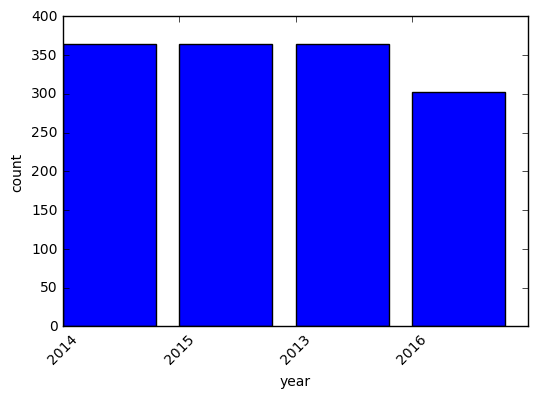

In [32]:
%matplotlib inline
result = _
result.bar()

#### As we can see from the picture, the number of arrested criminals is decreasing from 2013 to 2016.

#### f. See if there are some seasonal and monthly patterns of crimes

In [33]:
%%sql
SELECT month, count(month)
FROM time
GROUP BY month
ORDER BY month;

12 rows affected.


month,count
01,124
02,113
03,124
04,120
05,124
06,120
07,124
08,124
09,120
10,122


<Container object of 12 artists>

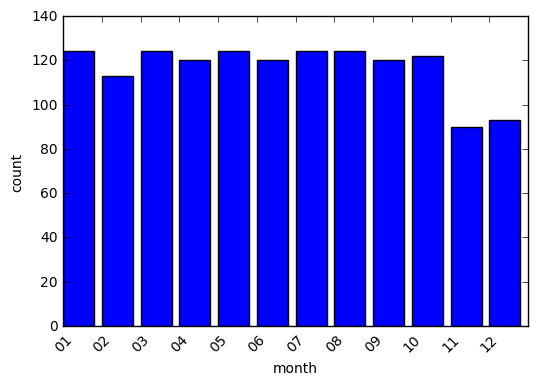

In [34]:
%matplotlib inline
result = _
result.bar()

In [35]:
%%sql
SELECT quarter, COUNT(quarter)
FROM time
GROUP BY quarter
ORDER BY quarter;

4 rows affected.


quarter,count
1,361
2,364
3,368
4,305


<Container object of 4 artists>

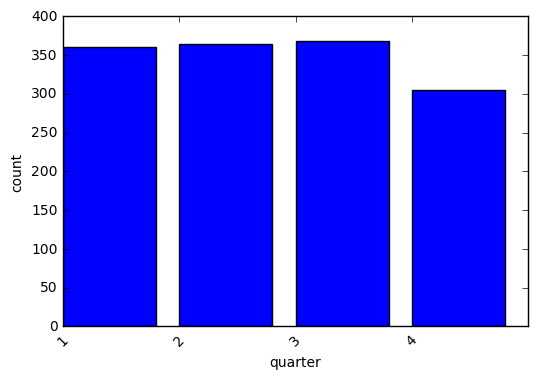

In [36]:
%matplotlib inline
result = _
result.bar()

#### Clearly winter/quarter 4 has the least crimes. 

#### g. Count numbers of all kinds of incident offences

In [37]:
%%sql
SELECT DISTINCT incident_offence, COUNT(incident_offence)
FROM crime
GROUP BY incident_offence
ORDER BY COUNT(incident_offence) DESC
LIMIT 10;

10 rows affected.


incident_offence,count
Unknown Offense,81377
87-Narcotics,12294
4E-Common Assault,6304
UNKNOWN OFFENSE,3209
87O-Narcotics (Outside),2602
6C-Larceny- Shoplifting,2222
79-Other,1959
24-Towed Vehicle,1581
97-Search & Seizure,1544
4C-Agg. Asslt.- Oth.,1466


#### h. Top 10 charge codes

In [38]:
%%sql
SELECT DISTINCT charge, COUNT(charge)
FROM crime
GROUP BY charge
ORDER BY COUNT(charge) DESC
LIMIT 10;

10 rows affected.


charge,count
4 3550,19010
1 1415,17977
0,16357
1 0077,16147
1 1635,5255
1 0573,4230
3 0233,4088
1 0088,3316
2A0696,2391
1 1420,2374


#### i. Top 10 charge descriptions

In [39]:
%%sql
SELECT DISTINCT charge_description, COUNT(charge_description)
FROM crime
GROUP BY charge_description
ORDER BY COUNT(charge_description) DESC
LIMIT 10;

10 rows affected.


charge_description,count
Failure To Appear || Failure To Appear,15373
Asslt-Sec Degree || Assault-Sec Degree,7769
Unknown Charge,7744
Cds:Possess-Not Marihuana || Cds Violation,5873
Cds:Possess-Not Marihuana || Cds,3760
Violation Of Probation || Violation Of Probation,3041
Asslt-Sec Degree || Common Assault,2805
Cds: Poss Marihuana L/T 10 G || Cds Violation,1633
Asslt-Sec Degree || Assault,1486
Prostitution-General || Prostitution,1431


#### j. Analyze top 10 charges and corresponding genders

In [40]:
%%sql
SELECT DISTINCT charge_description, sex, COUNT(sex)
FROM crime
GROUP BY charge_description, sex
ORDER BY COUNT(sex) DESC
LIMIT 10;

10 rows affected.


charge_description,sex,count
Failure To Appear || Failure To Appear,M,11553
Unknown Charge,M,6681
Asslt-Sec Degree || Assault-Sec Degree,M,6202
Cds:Possess-Not Marihuana || Cds Violation,M,4890
Failure To Appear || Failure To Appear,F,3820
Cds:Possess-Not Marihuana || Cds,M,3092
Violation Of Probation || Violation Of Probation,M,2274
Asslt-Sec Degree || Common Assault,M,2135
Asslt-Sec Degree || Assault-Sec Degree,F,1567
Cds: Poss Marihuana L/T 10 G || Cds Violation,M,1442


#### k. Districts ranked by corresponding criminal numbers

In [41]:
%%sql
SELECT DISTINCT district, COUNT(*)
FROM crime
GROUP BY district
ORDER BY COUNT(*) DESC;

10 rows affected.


district,count
0,51713
Southern,11028
Eastern,10374
Western,10142
Southeastern,9793
Northeastern,8902
Central,8773
Southwestern,7059
Northwestern,6955
Northern,5097


#### Southern district has the most criminals.

#### l. Neighborhoods ranked by corresponding criminal numbers

In [42]:
%%sql
SELECT DISTINCT neighborhood,COUNT(*) AS Frequency
FROM crime
GROUP BY neighborhood
ORDER BY Frequency DESC;

550 rows affected.


neighborhood,frequency
0,51721
DOWNTOWN,2581
SANDTOWN-WINCHESTER,1708
CARROLLTON RIDGE,1572
BROADWAY EAST,1480
PENN NORTH,1442
BROOKLYN,1375
Downtown,1138
UPTON,1103
BALTIMORE HIGHLANDS,1094


#### Seems downtown is the most dangerous neighborhood.

#### m. Posts ranked by corresponding criminal numbers

In [43]:
%%sql
SELECT DISTINCT post, COUNT(*)
FROM crime
GROUP BY post
ORDER BY COUNT(*) DESC
LIMIT 10;

10 rows affected.


post,count
0,51731
733,1802
223,1716
224,1641
732,1455
111,1254
212,1231
221,1194
113,1140
911,1132


#### n. Age and corresponding criminal numbers

In [44]:
%%sql
SELECT DISTINCT age, COUNT(*) AS Frequency
FROM crime
GROUP BY age
ORDER BY age;

74 rows affected.


age,frequency
0,58
14,7
15,13
16,264
17,302
18,3973
19,4785
20,5160
21,5909
22,5982


## Problem 3 - define a star schema, and load your data into it (30 points)

Define a star schema consisting of at least one fact table and at least two dimensions.  Transform your source data into the new fact table and dimensions.  Discuss your key modeling decisions.

Document your star schema with a diagram.  There several tools available for this, such as Google Docs and Microsoft Visio.

### 1. Create dimension tables

#### a. Create location dimension

In [45]:
%%sql
DROP TABLE IF EXISTS location;
CREATE TABLE location (
    location_key SERIAL,
    arrestLocation VARCHAR(33),
    incidentLocation VARCHAR(34),
    Location1 VARCHAR(31),
    CONSTRAINT pk_location_key PRIMARY KEY(location_key)
);

Done.
Done.


[]

In [46]:
%%sql
INSERT INTO location (arrestLocation, incidentLocation, Location1)
SELECT DISTINCT arrest_location, incident_location, location1
FROM crime;

42030 rows affected.


[]

In [47]:
%%sql
SELECT * FROM location
LIMIT 10;

10 rows affected.


location_key,arrestlocation,incidentlocation,location1
1,4100 FLEETWOOD AVE,4100 Fleetwood Av,"(39.3558990425, -76.5310915803)"
2,2600 WEGWORTH LN,2600 Wegworth Ln,"(39.2545661886, -76.6453235863)"
3,2500 BROOKFIELD AVE,2500 Brookfield Av,"(39.3157914808, -76.6338801822)"
4,0,2800 Argonne Dr,0
5,200 WASHBURN AVE,200 Washburn Av,"(39.2360039184, -76.6090551413)"
6,1900 LANCASTER ST,1900 Lancaster St,"(39.2827167492, -76.5887838251)"
7,5300 YORK RD,5300 York Rd,"(39.3541688679, -76.6098149966)"
8,3100 PULASKI HWY,0,"(39.2954526608, -76.5734386579)"
9,500 N EAST AVE,500 N East Av,"(39.2976372589, -76.5721280507)"
10,1200 SEMINOLE AVE,1200 Seminole Av,"(39.3001389111, -76.6912177084)"


#### b. Create charge dimension

In [48]:
%%sql
DROP TABLE IF EXISTS charge;
CREATE TABLE charge (
    charge_key SERIAL,
    charge VARCHAR(6),
    charge_description VARCHAR(54),
    CONSTRAINT pk_charge_key PRIMARY KEY(charge_key)
);

Done.
Done.


[]

In [49]:
%%sql
INSERT INTO charge (charge, charge_description)
SELECT DISTINCT charge, charge_description
FROM crime;

11975 rows affected.


[]

In [50]:
%%sql
SELECT * FROM charge
LIMIT 10;

10 rows affected.


charge_key,charge,charge_description
1,1 1106,CDS VIOLATION
2,3 0233,POSS W INT COCAINE
3,2A3550,Att-Cds Manuf/Dist. || Hgv/ Cds
4,5 3550,Cds:Poss Para || Cds Possess
5,0,Fugitive From Kansas
6,1 4200,Alc. Bev./Intox:Endanger || Common Assault
7,3 4030,Mal Destr Prop Value + $500 || Attemp B&E
8,2C3550,Con-Cds Manuf/Dist. || Distribution
9,2A3550,Att-Cds Manuf/Dist. || Cds Violations
10,0,Ta 16 101 A


#### c. Create district dimension

In [51]:
%%sql
DROP TABLE IF EXISTS district;
CREATE TABLE district (
    district_key SERIAL,
    district VARCHAR(12),
    post INTEGER,
    neighborhood VARCHAR(33),
    CONSTRAINT pk_district_key PRIMARY KEY(district_key)
);

Done.
Done.


[]

In [52]:
%%sql
INSERT INTO district (district, post, neighborhood)
SELECT DISTINCT district, post, neighborhood
FROM crime;

1424 rows affected.


[]

In [53]:
%%sql
SELECT * FROM district
LIMIT 10;

10 rows affected.


district_key,district,post,neighborhood
1,Southern,942,SPRING GARDEN INDUSTRIAL AREA
2,Northern,533,Hampden
3,Southeastern,232,Canton
4,Southwestern,814,FRANKLINTOWN ROAD
5,Southwestern,815,Lower Edmondson Village
6,Northwestern,611,DRUID HILL PARK
7,Southeastern,223,BALTIMORE HIGHLANDS
8,Western,736,PENN NORTH
9,Southeastern,233,MEDFORD
10,Eastern,322,GAY STREET


#### d. Create date dimension

In [54]:
%%sql
DROP TABLE IF EXISTS date;
CREATE TABLE date (
    date_key SERIAL,
    year CHAR(4),
    month CHAR(2),
    day CHAR(2),
    quarter CHAR(1),
    hour CHAR(5),
    CONSTRAINT pk_date_key PRIMARY KEY(date_key)
);

Done.
Done.


[]

In [55]:
%%sql
INSERT INTO date (year, month, day, quarter, hour)
SELECT DISTINCT
    TO_CHAR(arrest_date, 'YYYY') AS year,
    TO_CHAR(arrest_date, 'MM') AS month,
    TO_CHAR(arrest_date, 'DD') AS day,
    TO_CHAR(arrest_date, 'Q') AS quarter,
    arrest_time
FROM crime;

90388 rows affected.


[]

In [56]:
%%sql
SELECT * FROM date
LIMIT 10;

10 rows affected.


date_key,year,month,day,quarter,hour
1,2016,03,03,1,10:00
2,2015,05,30,2,02:39
3,2015,02,05,1,02:00
4,2013,12,23,4,21:35
5,2015,07,12,3,19:45
6,2015,08,11,3,20:00
7,2014,01,12,1,17:20
8,2016,09,24,3,0.30
9,2015,04,23,2,06:45
10,2015,06,29,2,19:00


### 2. Create fact table

In [57]:
%%sql
DROP TABLE IF EXISTS criminal;
CREATE TABLE criminal (
    locationkey INTEGER,
    chargekey INTEGER,
    districtkey INTEGER,
    datekey INTEGER,
    arrest INTEGER,
    age INTEGER,
    sex CHAR(1),
    race CHAR(1),
    arrest_date TIMESTAMP,
    arrest_time VARCHAR(5),
    arrest_location VARCHAR(33),
    incident_offence VARCHAR(28),
    incident_location VARCHAR(34),
    charge VARCHAR(6),
    charge_description VARCHAR(54),
    district VARCHAR(12),
    post INTEGER,
    neighborhood VARCHAR(33),
    location1 VARCHAR(31),
    FOREIGN KEY(locationkey) REFERENCES location(location_key),
    FOREIGN KEY(chargekey) REFERENCES charge(charge_key),
    FOREIGN KEY(districtkey) REFERENCES district(district_key),
    FOREIGN KEY(datekey) REFERENCES date(date_key)
);


Done.
Done.


[]

In [58]:
%%sql
INSERT INTO criminal (arrest, age, sex, race, arrest_date, arrest_time, arrest_location, incident_offence, incident_location,
                     charge, charge_description, district, post, neighborhood, location1)
SELECT
    arrest,
    age,
    sex,
    race,
    arrest_date,
    arrest_time,
    arrest_location,
    incident_offence,
    incident_location,
    charge,
    charge_description,
    district,
    post,
    neighborhood,
    location1
FROM crime;

129836 rows affected.


[]

In [59]:
%%sql
UPDATE criminal
SET locationkey = location.location_key
FROM location
WHERE
criminal.arrest_location = location.arrestLocation
AND
criminal.incident_location = location.incidentLocation
AND
criminal.location1 = location.Location1;

129836 rows affected.


[]

In [60]:
%%sql
SELECT * FROM criminal
LIMIT 10;

10 rows affected.


locationkey,chargekey,districtkey,datekey,arrest,age,sex,race,arrest_date,arrest_time,arrest_location,incident_offence,incident_location,charge,charge_description,district,post,neighborhood,location1
35859,None,None,None,16139961,37,M,B,2016-09-29 00:00:00,21.00,0,UNKNOWN OFFENSE,0,1 1415,ASSAULT-SEC DEGREE,0,0,0,0
35859,None,None,None,16133530,59,F,B,2016-09-16 00:00:00,11.25,0,UNKNOWN OFFENSE,0,1 0077,FAILURE TO APPEAR,0,0,0,0
35859,None,None,None,16084915,52,M,B,2016-06-11 00:00:00,06:15,0,Unknown Offense,0,0,Vop,0,0,0,0
35859,None,None,None,16063120,51,M,B,2016-04-30 00:00:00,00:30,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,None,None,None,16048494,29,M,B,2016-04-04 00:00:00,20:12,0,Unknown Offense,0,0,Traffic,0,0,0,0
35859,None,None,None,16046159,26,M,B,2016-03-30 00:00:00,10:33,0,Unknown Offense,0,0,Vop,0,0,0,0
35859,None,None,None,16012398,38,M,B,2016-01-28 00:00:00,00:18,0,Unknown Offense,0,1 0990,0,0,0,0,0
35859,None,None,None,15176072,51,M,B,2015-11-22 00:00:00,14:00,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,None,None,None,14034358,44,M,B,2014-03-06 00:00:00,13:00,0,Unknown Offense,0,0,Urinate In Public,0,0,0,0
35859,None,None,None,15165802,23,M,W,2015-11-03 00:00:00,14:00,0,Unknown Offense,0,1 1338,0,0,0,0,0


In [61]:
%%sql
UPDATE criminal
SET chargekey = charge.charge_key
FROM charge
WHERE
criminal.charge = charge.charge
AND
criminal.charge_description = charge.charge_description;

129836 rows affected.


[]

In [62]:
%%sql
SELECT * FROM criminal
LIMIT 10;

10 rows affected.


locationkey,chargekey,districtkey,datekey,arrest,age,sex,race,arrest_date,arrest_time,arrest_location,incident_offence,incident_location,charge,charge_description,district,post,neighborhood,location1
35859,4073,None,None,15165802,23,M,W,2015-11-03 00:00:00,14:00,0,Unknown Offense,0,1 1338,0,0,0,0,0
35859,1687,None,None,15159000,29,M,B,2015-10-22 00:00:00,00:30,0,Unknown Offense,0,1 0990,0,0,0,0,0
35859,4073,None,None,15155335,33,M,B,2015-10-15 00:00:00,03:20,0,Unknown Offense,0,1 1338,0,0,0,0,0
35859,11443,None,None,15136844,32,M,B,2015-09-11 00:00:00,00:50,0,Unknown Offense,0,0,Driving Onsuspend Lic,0,0,0,0
35859,9593,None,None,15122567,20,M,B,2015-08-16 00:00:00,02:30,0,Unknown Offense,0,0,Federal Remand,0,0,0,0
35859,10625,None,None,15101590,33,F,W,2015-07-07 00:00:00,14:00,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,10329,None,None,15054572,23,M,B,2015-04-08 00:00:00,00:15,0,Unknown Offense,0,0,Driving W/O Lic,0,0,0,0
35859,10625,None,None,15053361,22,F,B,2015-04-06 00:00:00,14:00,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,2578,None,None,15046179,56,M,B,2015-03-25 00:00:00,01:10,0,Unknown Offense,0,0,Fto,0,0,0,0
35859,5913,None,None,15044323,18,M,B,2015-03-22 00:00:00,11:00,0,Unknown Offense,0,0,Maldest,0,0,0,0


In [63]:
%%sql
UPDATE criminal
SET districtkey = district.district_key
FROM district
WHERE
criminal.district = district.district
AND
criminal.post = district.post
AND
criminal.neighborhood = district.neighborhood;

129836 rows affected.


[]

In [64]:
%%sql
SELECT * FROM criminal
LIMIT 10;

10 rows affected.


locationkey,chargekey,districtkey,datekey,arrest,age,sex,race,arrest_date,arrest_time,arrest_location,incident_offence,incident_location,charge,charge_description,district,post,neighborhood,location1
35859,2578,41,None,15046179,56,M,B,2015-03-25 00:00:00,01:10,0,Unknown Offense,0,0,Fto,0,0,0,0
35859,5913,41,None,15044323,18,M,B,2015-03-22 00:00:00,11:00,0,Unknown Offense,0,0,Maldest,0,0,0,0
35859,10625,41,None,15025716,33,M,B,2015-02-17 00:00:00,00:30,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,10425,41,None,14211011,33,F,B,2014-12-18 00:00:00,23:50,0,Unknown Offense,0,0,Vop,0,0,0,0
35859,10625,41,None,14181097,20,M,B,2014-10-27 00:00:00,10:30,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,10625,41,None,14161631,30,M,W,2014-09-23 00:00:00,18:30,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,2036,41,None,0,23,M,B,2015-07-14 00:00:00,23:27,0,Unknown Offense,0,0,Unknown Charge,0,0,0,0
35859,10625,41,None,14095425,38,M,B,2014-06-11 00:00:00,11:15,0,Unknown Offense,0,0,Detain Only,0,0,0,0
35859,3035,41,None,14088273,30,M,B,2014-05-31 00:00:00,02:30,0,Unknown Offense,0,0,Fta,0,0,0,0
35859,10625,41,None,14053953,44,M,B,2014-04-07 00:00:00,11:00,0,Unknown Offense,0,0,Detain Only,0,0,0,0


In [65]:
%%sql
ALTER TABLE criminal
ADD key SERIAL;

Done.


[]

In [66]:
%%sql
SELECT * FROM criminal
LIMIT 10;

10 rows affected.


locationkey,chargekey,districtkey,datekey,arrest,age,sex,race,arrest_date,arrest_time,arrest_location,incident_offence,incident_location,charge,charge_description,district,post,neighborhood,location1,key
35859,10625,41,None,14053953,44,M,B,2014-04-07 00:00:00,11:00,0,Unknown Offense,0,0,Detain Only,0,0,0,0,1
35859,2036,41,None,0,20,M,B,2015-01-27 00:00:00,10:40,0,Unknown Offense,0,0,Unknown Charge,0,0,0,0,2
35859,1945,41,None,14029790,52,M,B,2014-02-26 00:00:00,12:45,0,Unknown Offense,0,0,Fugitive From Delaware,0,0,0,0,3
35859,6198,41,None,14015960,21,F,B,2014-01-31 00:00:00,20:00,0,Unknown Offense,0,1 0023,Robbery || Robbery,0,0,0,0,4
35859,10625,41,None,14010173,39,M,W,2014-01-22 00:00:00,09:00,0,Unknown Offense,0,0,Detain Only,0,0,0,0,5
35859,9593,41,None,13767146,21,M,B,2013-10-14 00:00:00,14:45,0,Unknown Offense,0,0,Federal Remand,0,0,0,0,6
35859,2036,41,None,0,47,F,W,2014-10-17 00:00:00,11:00,0,Unknown Offense,0,0,Unknown Charge,0,0,0,0,7
35859,11435,41,None,13732402,29,F,W,2013-08-14 00:00:00,12:39,0,Unknown Offense,0,0,Dui,0,0,0,0,8
35859,3035,41,None,13668611,24,M,B,2013-04-18 00:00:00,01:20,0,Unknown Offense,0,0,Fta,0,0,0,0,9
35859,2414,41,None,13656485,45,F,B,2013-03-26 00:00:00,16:30,0,Unknown Offense,0,0,Fugitive,0,0,0,0,10


In [67]:
%%sql
DROP TABLE IF EXISTS time;
CREATE TABLE time (
    key SERIAL,
    year CHAR(4),
    month CHAR(2),
    day CHAR(2),
    quarter CHAR(1),
    hour CHAR(5)
);

Done.
Done.


[]

In [68]:
%%sql
INSERT INTO time (key, year, month, day, quarter, hour)
SELECT
    key,
    TO_CHAR(arrest_date, 'YYYY') AS year,
    TO_CHAR(arrest_date, 'MM') AS month,
    TO_CHAR(arrest_date, 'DD') AS day,
    TO_CHAR(arrest_date, 'Q') AS quarter,
    arrest_time
FROM criminal;

129836 rows affected.


[]

In [69]:
%%sql
SELECT * FROM time
LIMIT 10;

10 rows affected.


key,year,month,day,quarter,hour
1,2014,04,07,2,11:00
2,2015,01,27,1,10:40
3,2014,02,26,1,12:45
4,2014,01,31,1,20:00
5,2014,01,22,1,09:00
6,2013,10,14,4,14:45
7,2014,10,17,4,11:00
8,2013,08,14,3,12:39
9,2013,04,18,2,01:20
10,2013,03,26,1,16:30


In [70]:
%%sql
ALTER TABLE criminal
ADD year CHAR (4),
ADD month CHAR (2),
ADD day CHAR(2),
ADD quarter CHAR(1),
ADD hour CHAR(5);

Done.


[]

In [71]:
%%sql
UPDATE criminal
SET year = time.year,
    month = time.month,
    day = time.day,
    quarter = time.quarter,
    hour = time.hour
FROM time
WHERE
criminal.key = time.key

129836 rows affected.


[]

In [72]:
%%sql
SELECT * FROM criminal
LIMIT 50;

50 rows affected.


locationkey,chargekey,districtkey,datekey,arrest,age,sex,race,arrest_date,arrest_time,arrest_location,incident_offence,incident_location,charge,charge_description,district,post,neighborhood,location1,key,year,month,day,quarter,hour
33751,2868,41,None,16147740,24,M,B,2016-10-17 00:00:00,13:15,0,Unknown Offense,0,1 1415,ASSAULT-SEC DEGREE,0,0,0,"(0E-10, 0E-10)",881,2016,10,17,4,13:15
35859,10134,41,None,14180627,59,M,B,2014-10-25 00:00:00,20:33,0,Unknown Offense,0,0,Alc Bev/ Open Cont,0,0,0,0,923,2014,10,25,4,20:33
35859,7339,41,None,14062292,28,M,B,2014-04-19 00:00:00,14:00,0,Unknown Offense,0,0,Bench Fto,0,0,0,0,1107,2014,04,19,2,14:00
25847,6190,41,None,15068936,42,M,B,2015-05-03 00:00:00,01:50,0,Unknown Offense,3400 Callaway Ave,0,Curfew Violation,0,0,0,0,1692,2015,05,03,2,01:50
35859,8040,41,None,16113781,23,M,B,2016-08-08 00:00:00,22.45,0,UNKNOWN OFFENSE,0,0,DIRTBIKE,0,0,0,0,1816,2016,08,08,3,22.45
35859,10529,41,None,15104660,20,M,B,2015-07-13 00:00:00,20:25,0,Unknown Offense,0,0,Dirt Bike,0,0,0,0,2755,2015,07,13,3,20:25
32124,656,41,None,13734736,21,M,B,2013-08-18 00:00:00,17:20,0,79-Other,3000 East Dr,0,Dirt Bike Violation,0,0,0,0,2802,2013,08,18,3,17:20
5840,7702,41,None,16092015,25,M,B,2016-06-24 00:00:00,20:45,0,Unknown Offense,6200 Pulaski Hwy,0,Dirtbike,0,0,0,0,2933,2016,06,24,2,20:45
35859,1224,41,None,15166274,59,M,B,2015-11-04 00:00:00,11:00,0,Unknown Offense,0,0,Dispose Of Litter,0,0,0,0,3064,2015,11,04,4,11:00
35859,3675,41,None,14203590,31,M,B,2014-12-07 00:00:00,01:19,0,Unknown Offense,0,0,Driving On Suspended,0,0,0,0,3417,2014,12,07,4,01:19


In [73]:
%%sql
UPDATE criminal
SET datekey = date.date_key
FROM date
WHERE
criminal.year = date.year
AND
criminal.month = date.month
AND
criminal.day = date.day
AND
criminal.quarter = date.quarter
AND
criminal.hour = date.hour;

129836 rows affected.


[]

In [74]:
%%sql
SELECT * FROM criminal
LIMIT 10;

10 rows affected.


locationkey,chargekey,districtkey,datekey,arrest,age,sex,race,arrest_date,arrest_time,arrest_location,incident_offence,incident_location,charge,charge_description,district,post,neighborhood,location1,key,year,month,day,quarter,hour
35859,2868,41,27925,16142831,25,F,W,2016-10-06 00:00:00,10:30,0,Unknown Offense,0,1 1415,ASSAULT-SEC DEGREE,0,0,0,0,36214,2016,10,06,4,10:30
35859,2868,41,87189,16130038,21,M,B,2016-09-10 00:00:00,2.40,0,UNKNOWN OFFENSE,0,1 1415,ASSAULT-SEC DEGREE,0,0,0,0,36264,2016,09,10,3,2.40
35859,2868,41,7233,16109972,31,M,B,2016-08-01 00:00:00,12.20,0,UNKNOWN OFFENSE,0,1 1415,ASSAULT-SEC DEGREE,0,0,0,0,36314,2016,08,01,3,12.20
35859,8846,41,34606,16024257,18,M,B,2016-02-18 00:00:00,20:47,0,Unknown Offense,0,1 0175,Handgun In Vehicle || Handgun In Vehicle,0,0,0,0,36668,2016,02,18,1,20:47
35859,11797,41,49958,13711774,23,M,B,2013-07-08 00:00:00,21:30,0,Unknown Offense,0,1 0233,Cds Poss W/Int To Dist || Cds Poss W/Int To Dist,0,0,0,0,37530,2013,07,08,3,21:30
38275,6208,41,1843,13622640,30,M,W,2013-01-22 00:00:00,21:30,0,97-Search & Seizure,I 83N & Falls Rd,1 0233,Cds Poss W/Int To Dist || Cds Violation,0,0,0,0,37733,2013,01,22,1,21:30
10447,3369,41,89412,14052056,20,M,B,2014-04-03 00:00:00,18:15,0,Unknown Offense,1400 E Hoffman St,1 0233,Cds Poss W/Int To Dist || Poss Cds,0,0,0,0,37894,2014,04,03,2,18:15
35859,644,41,38248,13790216,40,M,B,2013-11-28 00:00:00,12:00,0,Unknown Offense,0,1 0248,Cds:Obtain By Fraud || Cds:Obtain By Fraud,0,0,0,0,38097,2013,11,28,4,12:00
35859,11750,41,84892,16055775,21,M,W,2016-04-16 00:00:00,10:00,0,Unknown Offense,0,1 0349,Alc Bev./Retail Area Drink || Assault,0,0,0,0,38472,2016,04,16,2,10:00
35859,2419,41,63865,16116024,24,M,B,2016-08-11 00:00:00,22.00,0,UNKNOWN OFFENSE,0,1 0487,CDS: DISTR ETC. W/FIREARM,0,0,0,0,38638,2016,08,11,3,22.00


In [75]:
%%sql
ALTER TABLE criminal
DROP arrest, 
DROP arrest_date,
DROP arrest_time,
DROP arrest_location,
DROP incident_offence,
DROP incident_location,
DROP charge,
DROP charge_description,
DROP district,
DROP post,
DROP neighborhood,
DROP location1,
DROP key,
DROP year,
DROP month,
DROP day,
DROP quarter,
DROP hour;

Done.


[]

In [76]:
%%sql
SELECT * FROM criminal
LIMIT 10;

10 rows affected.


locationkey,chargekey,districtkey,datekey,age,sex,race
35859,2419,41,63865,24,M,B
35859,1423,41,82068,27,M,B
18933,2839,41,38860,31,M,B
4049,9435,41,6875,24,M,B
10247,9435,41,35819,25,M,B
35859,6089,41,46254,32,M,B
35859,9051,41,31923,44,M,B
35859,9051,41,49913,19,M,B
35859,7206,41,33458,25,M,B
9883,5232,1065,58234,24,M,B


In [77]:
from IPython.display import Image
Image(url = "https://raw.githubusercontent.com/gwsb-istm-6212-fall-2016/JingningLi/master/diagram.jpg", width=1000, height=1000)

We create four dimension tables and one fact table. Four dimension tables are location, cahrge, district and date. One fact table is criminal. All four dimension tables have their own surrogate keys which are location_key, charge_key, district_key and date_key. All four surrogate keys are primary keys in their own dimension tables. And all four of them are included in the fact table, which have been referenced as foreign keys. We include age, sex and race in our fact table. All three of them are kinds of factless fact, because they are not typical facts to measure a process. So our fact table are actually factless fact table. 

## Problem 4 - explore your data in its new schema (30 points)

Strictly using the dimensional model tables you defined and populated for Problem 3, explore your data in its new form.  Use any of the query strategies we've seen in class, including transformations, aggregates, subqueries, rollups, and, of course, joins.  Add plots to highlight particular themes that stand out.  Describe your thinking and observations along the way.

### 1. Take a look of all dimensions and fact table.

In [78]:
%%sql
SELECT * FROM location
LIMIT 5;

5 rows affected.


location_key,arrestlocation,incidentlocation,location1
1,4100 FLEETWOOD AVE,4100 Fleetwood Av,"(39.3558990425, -76.5310915803)"
2,2600 WEGWORTH LN,2600 Wegworth Ln,"(39.2545661886, -76.6453235863)"
3,2500 BROOKFIELD AVE,2500 Brookfield Av,"(39.3157914808, -76.6338801822)"
4,0,2800 Argonne Dr,0
5,200 WASHBURN AVE,200 Washburn Av,"(39.2360039184, -76.6090551413)"


In [79]:
%%sql
SELECT * FROM charge
LIMIT 5;

5 rows affected.


charge_key,charge,charge_description
1,1 1106,CDS VIOLATION
2,3 0233,POSS W INT COCAINE
3,2A3550,Att-Cds Manuf/Dist. || Hgv/ Cds
4,5 3550,Cds:Poss Para || Cds Possess
5,0,Fugitive From Kansas


In [80]:
%%sql
SELECT * FROM district
LIMIT 5;

5 rows affected.


district_key,district,post,neighborhood
1,Southern,942,SPRING GARDEN INDUSTRIAL AREA
2,Northern,533,Hampden
3,Southeastern,232,Canton
4,Southwestern,814,FRANKLINTOWN ROAD
5,Southwestern,815,Lower Edmondson Village


In [81]:
%%sql
SELECT * FROM date
LIMIT 5;

5 rows affected.


date_key,year,month,day,quarter,hour
1,2016,03,03,1,10:00
2,2015,05,30,2,02:39
3,2015,02,05,1,02:00
4,2013,12,23,4,21:35
5,2015,07,12,3,19:45


In [82]:
%%sql
SELECT * FROM criminal
LIMIT 5;

5 rows affected.


locationkey,chargekey,districtkey,datekey,age,sex,race
35859,7206,41,33458,25,M,B
9883,5232,1065,58234,24,M,B
35859,2868,41,49541,25,F,W
35859,2868,41,64231,29,M,B
35859,2868,41,17264,26,M,B


### 2. Find out which age groups will commit the most ferequent crimes

### Find out the most ten frequent crimes

In [83]:
%%sql
SELECT charge.charge_description,COUNT(charge.charge_description) AS Frequency
FROM criminal
LEFT JOIN charge
ON criminal.chargekey = charge.charge_key
GROUP BY charge.charge_description
ORDER BY Frequency DESC
LIMIT 10;

10 rows affected.


charge_description,frequency
Failure To Appear || Failure To Appear,15373
Asslt-Sec Degree || Assault-Sec Degree,7769
Unknown Charge,7744
Cds:Possess-Not Marihuana || Cds Violation,5873
Cds:Possess-Not Marihuana || Cds,3760
Violation Of Probation || Violation Of Probation,3041
Asslt-Sec Degree || Common Assault,2805
Cds: Poss Marihuana L/T 10 G || Cds Violation,1633
Asslt-Sec Degree || Assault,1486
Prostitution-General || Prostitution,1431


### Group the age
We find that there are some 0 value of age variable, which we think it is not a maningful value because it is impossible that a new born baby will commit crimes. So we treate 0 as null value and will not group age equal to 0 to any age group.

In [84]:
%%sql
ALTER TABLE criminal
ADD age_group VARCHAR(20); 

Done.


[]

In [85]:
%%sql
UPDATE criminal
SET age_group = '1-9'
WHERE length(age::text) = 1
AND age != 0

0 rows affected.


[]

In [86]:
%%sql
UPDATE criminal
SET age_group = '10-19'
WHERE age::text like '1%';

9345 rows affected.


[]

In [87]:
%%sql
UPDATE criminal
SET age_group = '20-29'
WHERE age::text like '2%';

54049 rows affected.


[]

In [88]:
%%sql
UPDATE criminal
SET age_group = '30-39'
WHERE age::text like '3%';

29919 rows affected.


[]

In [89]:
%%sql
UPDATE criminal
SET age_group = '30-39'
WHERE age::text like '3%';

29919 rows affected.


[]

In [90]:
%%sql
UPDATE criminal
SET age_group = '40-49'
WHERE age::text like '4%';

21368 rows affected.


[]

In [91]:
%%sql
UPDATE criminal
SET age_group = '50-59'
WHERE age::text like '5%';

12746 rows affected.


[]

In [92]:
%%sql
UPDATE criminal
SET age_group = '60-69'
WHERE age::text like '6%';

2146 rows affected.


[]

In [93]:
%%sql
UPDATE criminal
SET age_group = '70-79'
WHERE age::text like '7%';

191 rows affected.


[]

In [94]:
%%sql
UPDATE criminal
SET age_group = '80-89'
WHERE age::text like '8%';

13 rows affected.


[]

In [95]:
%%sql
UPDATE criminal
SET age_group = '90-100'
WHERE age::text like '9%'
OR
age = 100;

2 rows affected.


[]

In [96]:
%%sql
SELECT * FROM criminal
LIMIT 10

10 rows affected.


locationkey,chargekey,districtkey,datekey,age,sex,race,age_group
35859,2868,41,17264,26,M,B,20-29
18878,5803,41,76390,23,F,B,20-29
35859,9502,41,12441,47,M,B,40-49
35859,9502,41,21577,19,M,B,10-19
35859,9216,41,19245,39,M,B,30-39
35859,9216,41,79533,47,M,B,40-49
11311,9502,41,30699,52,M,B,50-59
27042,11508,41,77394,32,M,B,30-39
15673,11508,41,77618,31,M,B,30-39
35859,9502,41,77258,20,F,B,20-29


### Join criminal and charge to find which age groups  will commit the most ferequent crimes

In [97]:
%%sql
SELECT charge.charge_description, age_group, COUNT(charge_description) AS Frequency
FROM criminal
LEFT JOIN charge
ON criminal.chargekey = charge.charge_key
AND charge.charge_description = 'Failure To Appear || Failure To Appear'
GROUP BY charge.charge_description, age_group
ORDER BY Frequency DESC
LIMIT 5;

5 rows affected.


charge_description,age_group,frequency
Failure To Appear || Failure To Appear,20-29,6224
Failure To Appear || Failure To Appear,30-39,3611
Failure To Appear || Failure To Appear,40-49,2882
Failure To Appear || Failure To Appear,50-59,1657
Failure To Appear || Failure To Appear,10-19,665


<Container object of 5 artists>

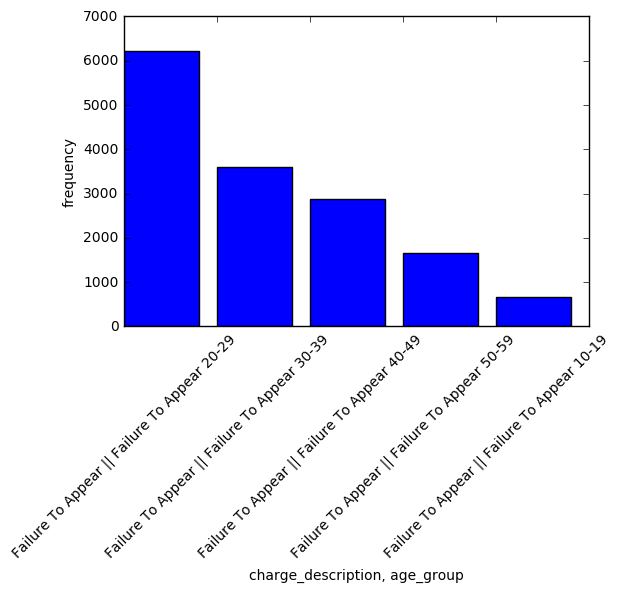

In [98]:
%matplotlib inline
result = _
result.bar()

In [99]:
%%sql
SELECT charge.charge_description, age_group, COUNT(charge_description) AS Frequency
FROM criminal
LEFT JOIN charge
ON criminal.chargekey = charge.charge_key
AND charge.charge_description = 'Asslt-Sec Degree || Assault-Sec Degree'
GROUP BY charge.charge_description, age_group
ORDER BY Frequency DESC
LIMIT 5;

5 rows affected.


charge_description,age_group,frequency
Asslt-Sec Degree || Assault-Sec Degree,20-29,3529
Asslt-Sec Degree || Assault-Sec Degree,30-39,2045
Asslt-Sec Degree || Assault-Sec Degree,40-49,1089
Asslt-Sec Degree || Assault-Sec Degree,50-59,636
Asslt-Sec Degree || Assault-Sec Degree,10-19,330


<Container object of 5 artists>

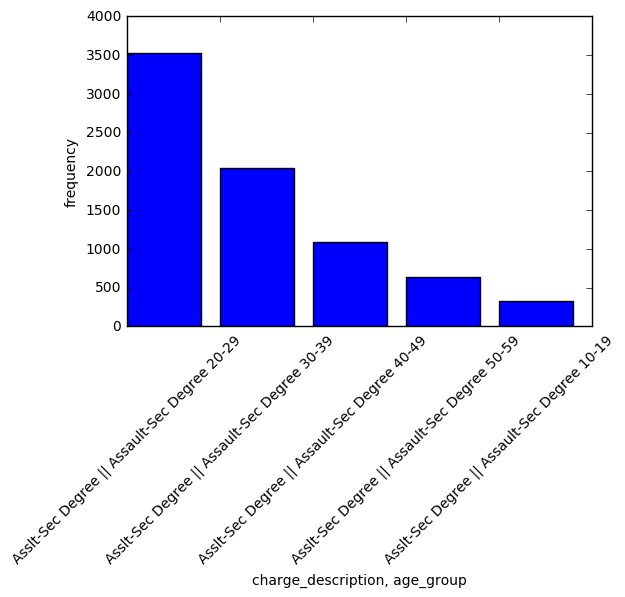

In [100]:
%matplotlib inline
result = _
result.bar()

In [101]:
%%sql
SELECT charge.charge_description, age_group, COUNT(charge_description) AS Frequency
FROM criminal
LEFT JOIN charge
ON criminal.chargekey = charge.charge_key
AND charge.charge_description = 'Cds:Possess-Not Marihuana || Cds Violation'
GROUP BY charge.charge_description, age_group
ORDER BY Frequency DESC
LIMIT 5;

5 rows affected.


charge_description,age_group,frequency
Cds:Possess-Not Marihuana || Cds Violation,20-29,1746
Cds:Possess-Not Marihuana || Cds Violation,40-49,1444
Cds:Possess-Not Marihuana || Cds Violation,50-59,1096
Cds:Possess-Not Marihuana || Cds Violation,30-39,1084
Cds:Possess-Not Marihuana || Cds Violation,10-19,294


<Container object of 5 artists>

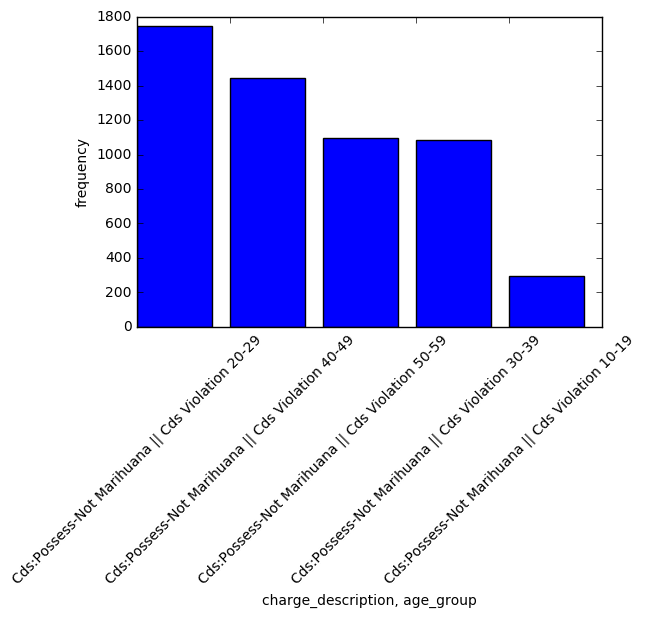

In [102]:
%matplotlib inline
result = _
result.bar()

In [103]:
%%sql
SELECT charge.charge_description, age_group, COUNT(charge_description) AS Frequency
FROM criminal
LEFT JOIN charge
ON criminal.chargekey = charge.charge_key
AND charge.charge_description = 'Cds:Possess-Not Marihuana || Cds'
GROUP BY charge.charge_description, age_group
ORDER BY Frequency DESC
LIMIT 5;

5 rows affected.


charge_description,age_group,frequency
Cds:Possess-Not Marihuana || Cds,20-29,1246
Cds:Possess-Not Marihuana || Cds,40-49,844
Cds:Possess-Not Marihuana || Cds,30-39,747
Cds:Possess-Not Marihuana || Cds,50-59,577
Cds:Possess-Not Marihuana || Cds,10-19,225


<Container object of 5 artists>

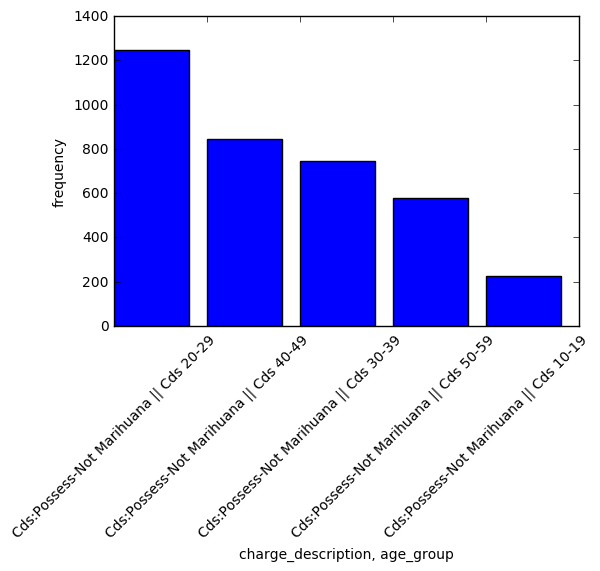

In [104]:
%matplotlib inline
result = _
result.bar()

In [105]:
%%sql
SELECT charge.charge_description, age_group, COUNT(charge_description) AS Frequency
FROM criminal
LEFT JOIN charge
ON criminal.chargekey = charge.charge_key
AND charge.charge_description = 'Violation Of Probation || Violation Of Probation'
GROUP BY charge.charge_description, age_group
ORDER BY Frequency DESC
LIMIT 5;

5 rows affected.


charge_description,age_group,frequency
Violation Of Probation || Violation Of Probation,20-29,1191
Violation Of Probation || Violation Of Probation,30-39,682
Violation Of Probation || Violation Of Probation,40-49,621
Violation Of Probation || Violation Of Probation,50-59,336
Violation Of Probation || Violation Of Probation,10-19,145


<Container object of 5 artists>

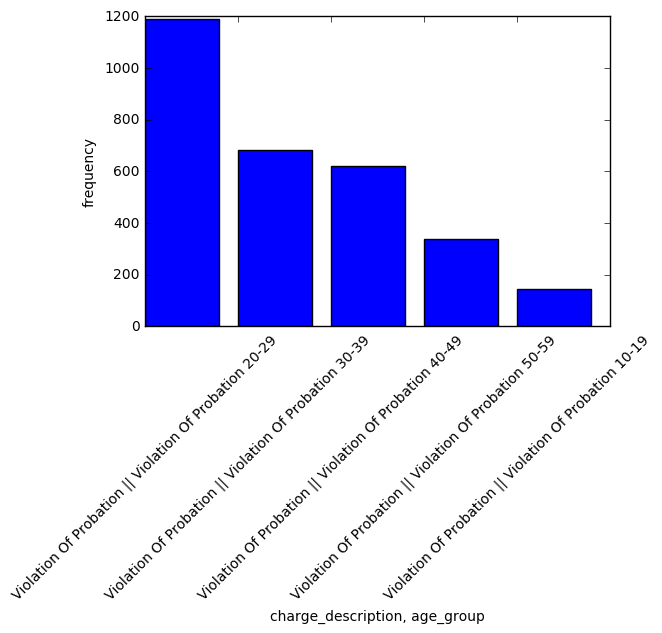

In [106]:
%matplotlib inline
result = _
result.bar()

### 2. Analyze average ages of top 10 crime types

In [107]:
%%sql
SELECT charge.charge_description, ROUND(AVG(criminal.age),2), COUNT(charge.charge_description)
FROM criminal
LEFT JOIN charge
ON criminal.chargekey=charge.charge_key
GROUP BY charge.charge_description
ORDER BY COUNT(charge.charge_description) DESC
LIMIT 10;

10 rows affected.


charge_description,round,count
Failure To Appear || Failure To Appear,34.11,15373
Asslt-Sec Degree || Assault-Sec Degree,32.55,7769
Unknown Charge,32.42,7744
Cds:Possess-Not Marihuana || Cds Violation,37.68,5873
Cds:Possess-Not Marihuana || Cds,36.17,3760
Violation Of Probation || Violation Of Probation,34.33,3041
Asslt-Sec Degree || Common Assault,32.81,2805
Cds: Poss Marihuana L/T 10 G || Cds Violation,28.36,1633
Asslt-Sec Degree || Assault,32.58,1486
Prostitution-General || Prostitution,34.76,1431


<Container object of 10 artists>

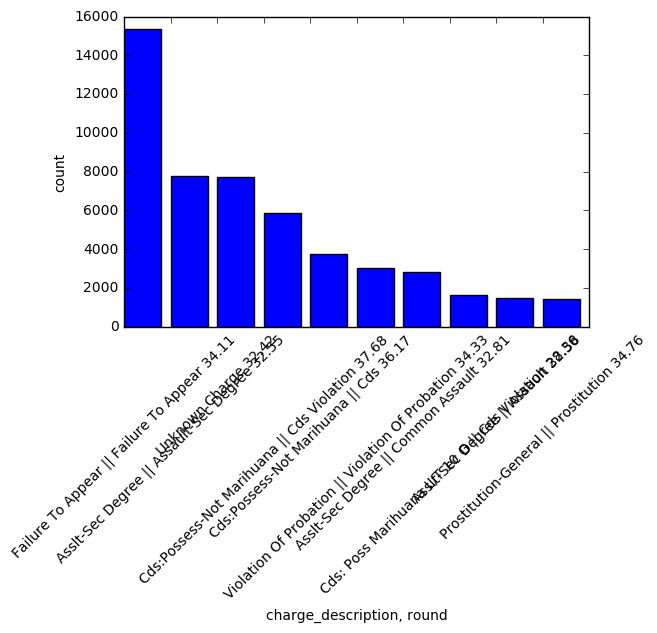

In [108]:
%matplotlib inline
result = _
result.bar()

We assume the charge description can tell us thorough and detailed information about diffrent crime types. So we use charge description as crime type.

From these pictures shown above, we can find that for top criminal types-"Failure To Appear", "Asslt-Sec Degree " and "Violation Of Probation ", the most frequent groups are 20-29, 30-39, 40-49 and 50-59. While for "Cds:Possess-Not Marihuana || Cds Violation" and "Cds:Possess-Not Marihuana || Cds Violation",pattern of the most frequent age groups have changed. Age group 40-49 and 50-59 bacome ahead of 30-39, although 20-29 is still the most frequent group. 

Also, we analyze the average age of top 10 frequently commited crimes. The averge ages are similar to each other related to top 10 crimes, from min=28 to max=37, which prove that among all age groups, 20-29 and 30-39 age groups have the largest criminals and also the most frequent age groups for different crime type.

### 3. Analyze genders of top 10 crime types

In [109]:
%%sql
SELECT charge.charge_description, criminal.sex, COUNT(charge.charge_description)
FROM criminal
LEFT JOIN charge
ON criminal.chargekey=charge.charge_key
GROUP BY charge.charge_description, criminal.sex
ORDER BY COUNT(charge.charge_description) DESC
LIMIT 10;

10 rows affected.


charge_description,sex,count
Failure To Appear || Failure To Appear,M,11553
Unknown Charge,M,6681
Asslt-Sec Degree || Assault-Sec Degree,M,6202
Cds:Possess-Not Marihuana || Cds Violation,M,4890
Failure To Appear || Failure To Appear,F,3820
Cds:Possess-Not Marihuana || Cds,M,3092
Violation Of Probation || Violation Of Probation,M,2274
Asslt-Sec Degree || Common Assault,M,2135
Asslt-Sec Degree || Assault-Sec Degree,F,1567
Cds: Poss Marihuana L/T 10 G || Cds Violation,M,1442


We can see from the picture, male crimes are much more than female overall. And for the same crime type, male crimes are still much more than female.

### 4. Analyze top 10 districts/neighborhoods with most crimes and race in these districts/neighborhoods

In [110]:
%%sql
SELECT district.district, criminal.race, COUNT(district.district)
FROM criminal
LEFT JOIN district
ON criminal.districtkey=district.district_key
GROUP BY district.district, criminal.race
ORDER BY COUNT(district.district) DESC
LIMIT 10;

10 rows affected.


district,race,count
0,B,41591
Western,B,9725
Eastern,B,9657
0,W,8914
Central,B,7671
Northeastern,B,7659
Southern,B,6887
Northwestern,B,6544
Southwestern,B,6037
Southeastern,B,5869


<Container object of 10 artists>

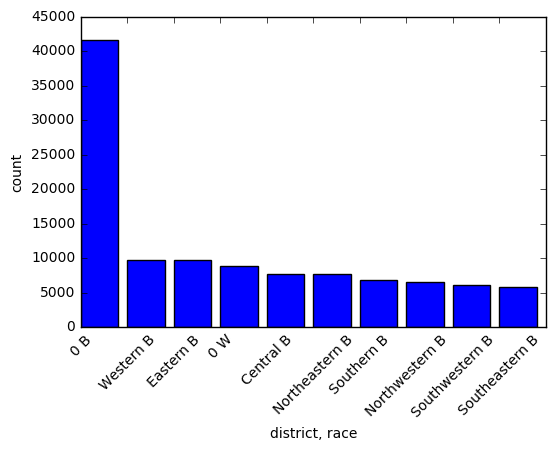

In [111]:
%matplotlib inline
result = _
result.bar()

In [112]:
%%sql
SELECT district.neighborhood, criminal.race, COUNT(district.neighborhood)
FROM criminal
LEFT JOIN district
ON criminal.districtkey=district.district_key
GROUP BY district.neighborhood, criminal.race
ORDER BY COUNT(district.neighborhood) DESC
LIMIT 10;

10 rows affected.


neighborhood,race,count
0,B,41598
0,W,8915
DOWNTOWN,B,2172
SANDTOWN-WINCHESTER,B,1660
PENN NORTH,B,1389
BROADWAY EAST,B,1379
UPTON,B,1067
BELAIR-EDISON,B,997
CARROLLTON RIDGE,B,976
CENTRAL PARK HEIGHTS,B,949


It is obvious that for majority districts and neighborhood, B race is the most frequent criminals.

### 5. Analyze top 10 combination of crimes and races

In [113]:
%%sql
SELECT charge.charge_description, criminal.race, COUNT(criminal.race)
FROM criminal
LEFT JOIN charge
ON criminal.districtkey=charge.charge_key
GROUP BY charge.charge_description, criminal.race
ORDER BY COUNT(criminal.race) DESC
LIMIT 10;

10 rows affected.


charge_description,race,count
Extortion:Value $500. Plus || Dest Of Property,B,41590
Extortion:Value $500. Plus || Dest Of Property,W,8914
Handgun In Vehicle || Handgun,B,1142
Extortion:Value $500. Plus || Dest Of Property,U,926
Cds: Possession-Marihuana || Possess Cds,B,656
Att-Sex Off Reg-Change Address || Att-Sex Off Reg-Fail,B,642
Cds:Possess-Not Marihuana || Cds- Heroin,B,598
Cds:Possess-Not Marihuana || Cds Poss Oxycodone,B,591
Cds Manuf/Dist-Narc || Dist Cocaine,B,590
CDS,B,532


### 6. Analyze top crimes and genders in year 2016

In [114]:
%%sql
SELECT '2016' AS year, charge.charge_description, criminal.sex, COUNT(charge.charge_description)
FROM criminal
LEFT JOIN date
ON criminal.datekey=date.date_key
LEFT JOIN charge
ON criminal.chargekey=charge.charge_key
GROUP BY charge.charge_description, criminal.sex
ORDER BY COUNT(charge.charge_description) DESC
LIMIT 10;

10 rows affected.


year,charge_description,sex,count
2016,Failure To Appear || Failure To Appear,M,11553
2016,Unknown Charge,M,6681
2016,Asslt-Sec Degree || Assault-Sec Degree,M,6202
2016,Cds:Possess-Not Marihuana || Cds Violation,M,4890
2016,Failure To Appear || Failure To Appear,F,3820
2016,Cds:Possess-Not Marihuana || Cds,M,3092
2016,Violation Of Probation || Violation Of Probation,M,2274
2016,Asslt-Sec Degree || Common Assault,M,2135
2016,Asslt-Sec Degree || Assault-Sec Degree,F,1567
2016,Cds: Poss Marihuana L/T 10 G || Cds Violation,M,1442


### 7. Using rollup to see the frequency of combination of charge decription, sex and neighborhood

In [115]:
%%sql
SELECT '2015' AS year, charge.charge_description, criminal.sex, district.neighborhood, COUNT(charge.charge_description)
FROM criminal
LEFT JOIN date
ON criminal.datekey=date.date_key
LEFT JOIN charge
ON criminal.chargekey=charge.charge_key
LEFT JOIN district
ON criminal.districtkey=district.district_key
GROUP BY ROLLUP (charge.charge_description, criminal.sex, district.neighborhood)
ORDER BY COUNT(charge.charge_description) DESC
LIMIT 10;

10 rows affected.


year,charge_description,sex,neighborhood,count
2015,None,None,None,129836
2015,Failure To Appear || Failure To Appear,None,None,15373
2015,Failure To Appear || Failure To Appear,M,None,11553
2015,Failure To Appear || Failure To Appear,M,0,11541
2015,Asslt-Sec Degree || Assault-Sec Degree,None,None,7769
2015,Unknown Charge,None,None,7744
2015,Unknown Charge,M,None,6681
2015,Asslt-Sec Degree || Assault-Sec Degree,M,None,6202
2015,Asslt-Sec Degree || Assault-Sec Degree,M,0,6196
2015,Cds:Possess-Not Marihuana || Cds Violation,None,None,5873


### 7. Analyze realationship between hour and frequency of specific crime type

In [116]:
%%sql
SELECT date.hour, COUNT(charge.charge_description) AS Frequency
FROM (criminal
      LEFT JOIN date
      ON criminal.datekey = date.date_key
      LEFT JOIN charge
      ON criminal.chargekey = charge.charge_key)
WHERE charge.charge_description = 'Cds:Possess-Not Marihuana || Cds Violation'
AND criminal.age_group = '20-29'
GROUP BY date.hour
ORDER BY Frequency DESC
LIMIT 24;

24 rows affected.


hour,frequency
20:00,34
13:00,32
21:00,31
18:30,30
11:00,28
19:00,28
15:00,27
12:00,26
11:30,25
17:00,25


From studies above, we are interested in the crime type: Cds:Possess-Not Marihuana || Cds Violation because it shows a different criminal age group pattern. So we do a deep analyze to find if there are any relationships between it and the crime time. It turns out the frequent time is a day for this kind of crime happened in from 20:00 to 21:00. And it also happened heavily in afternoon. It is more less happened in the morning.

## Bonus (10 points for one of A or B)


### Option A - Automating ETL

Consider the work you did to load your original raw dataset and then transform it into a dimensional model for analysis.  What would it take to automate this process?  How often would you need to update the data?  Could you easily automate any data cleaning steps?  What checks would you need to put in place to ensure quality?  Would humans need to be involved, or could you automate it all?

Discuss.


### Option B - Augmenting dimensions

Considering your dimensional model, what external data could you find to augment it?  As in the case of bike trips, where weather might provide an interesting added dimension/context not present in the original data, you can probably find another source of data to complement your own model.  Identify one such source and add it to your model, demonstrating its value with a few new queries.

### Option A - Automating ETL

#### What would it take to automate this process? 

We already wrote many SQL scripts for ETL process. Automating these tests means we need to develop a solution to store these scripts, schedule the execution and automate the comparison of the outcome of the test scripts with the expected results. And this procedure can be stored to run again and again.

We can start with the time data since every new record would have a new date column. So we build this procedure to check the newest dates and update other columns accordingly. After it updates and inserts new infomation, the scripts can finish the rest work: transform data into dimensional models.

#### How often would you need to update the data?

I think the frequency of updating data depends on the industry. Considering the data we analyze is crime records, I think it's reasonable that we update it everyday, since we can see many records happen in same days.

#### Could you easily automate any data cleaning steps? 

Similar to previous automating procedure, I believe we can easily automate the cleaning steps by creating a stored procedure to check null values in new records and deal with it like we did before.

#### What checks would you need to put in place to ensure quality?

The automating procedure could work fine in updating and cleaning data. But we still need to make efforts in solving other potential problems. First we need to create and store scripts to make sure there's no duplicate records being inserted, which means checking if 2 records are exactly same and delete one of them. Or we can set a process reporting duplicates before deleting them.
Second we need to create another procedure to handle data exception. For example when data is unresonablely big or small, or too many mulls in one record. So this procedure identify exceptions and report them.

#### Would humans need to be involved, or could you automate it all?

I think humans need to be involved like when data exceptions or duplicates emerge and people need to decide cope strategies instead of letting scripts automating it all.

### collaboration

Collaborators:
Yunning Zhu
Jingning Li

We both participated in all parts of this projects. It is kind of perfect half-half work. For example, for part III, Yunning found out ways to connect keys in dimension tables to fact tabels and Jingning handle all null values to make sure all transcation in fact table can have a key.

We try our best to figure out problems when we enconter them and help each other solving problems. We feel good in this collaboration. 